In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm.auto import tqdm
import seaborn as sns
import statsmodels.api as sm
sns.set()

Data Analysis

In [38]:
res = pd.read_csv('res.csv')
features=res[['SW','phie','GR','RHOB','ILD','X','Y','Z']]

In [39]:
features.corr().to_excel('corr.xlsx')

<IPython.core.display.Javascript object>


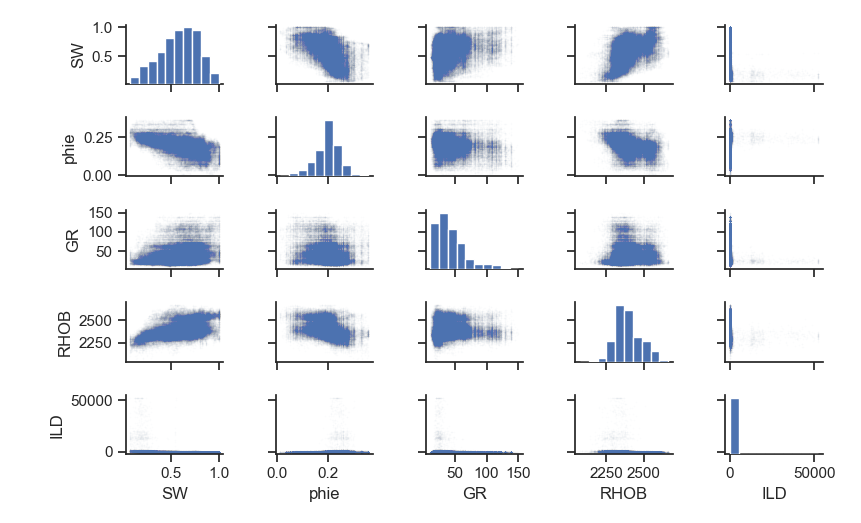

In [57]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(res[['SW','phie','GR','RHOB','ILD']].iloc[::njump],height=1,plot_kws={"s": 0.0001,"marker":'.',"edgecolor":"b"})

In [198]:
n_to_plot=200000
njump=int(len(res)/n_to_plot)

<IPython.core.display.Javascript object>


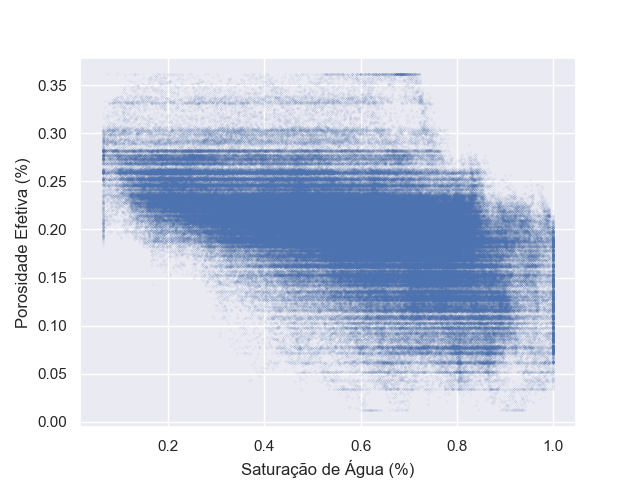

In [41]:
%matplotlib notebook
plt.scatter(res['SW'].iloc[::1],res['phie'].iloc[::1],marker=".",s=0.01,c='b')
plt.xlabel('Saturação de Água (%)')
plt.ylabel('Porosidade Efetiva (%)')

plt.show()

<IPython.core.display.Javascript object>


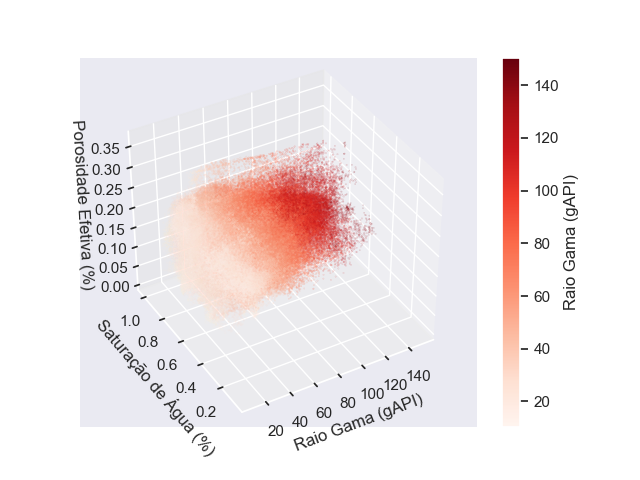

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(res['GR'].iloc[::1],res['SW'].iloc[::1],res['phie'].iloc[::1],s=0.01,cmap='Reds',c=res['GR'].iloc[::1],zdir='z',depthshade=True)
cbar = fig.colorbar(p)
cbar.set_label('Raio Gama (gAPI)')
ax.view_init(40, -120)
ax.set_ylabel('Saturação de Água (%)')
ax.set_zlabel('Porosidade Efetiva (%)')
ax.set_xlabel('Raio Gama (gAPI)')
plt.show()

PCA

In [5]:
from sklearn.cluster import *
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [6]:
data0=preprocessing.scale(features)

In [7]:
pca = PCA(n_components=4)
pcs = pca.fit_transform(data0).T
print(np.sum(pca.explained_variance_ratio_),pca.explained_variance_ratio_)

0.7681095992024496 [0.27651991 0.22450171 0.14461157 0.12247641]


<IPython.core.display.Javascript object>


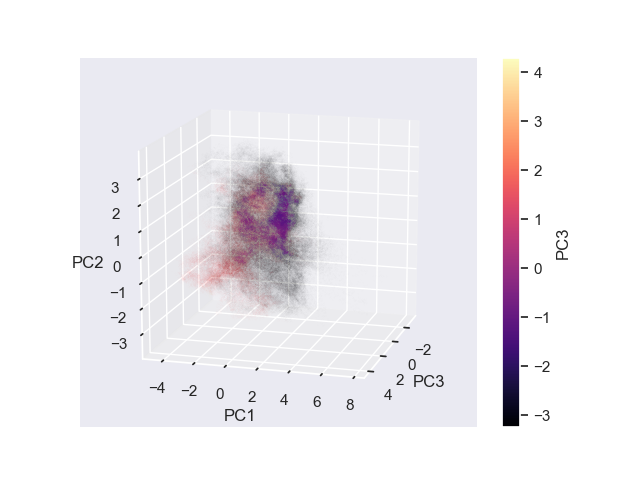

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(pcs[2][::1],pcs[0][::1],pcs[1][::1],c=pcs[2][::1],zdir='z',cmap='magma',depthshade=True,s=0.000003)
cbar = fig.colorbar(p)
cbar.set_label('PC3')
ax.set_xlabel('PC3')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
ax.view_init(15, 16)
plt.show()


In [72]:
df_pcs = pd.DataFrame(pcs.T)
df_pcs.columns=["PC1","PC2","PC3"]

<IPython.core.display.Javascript object>


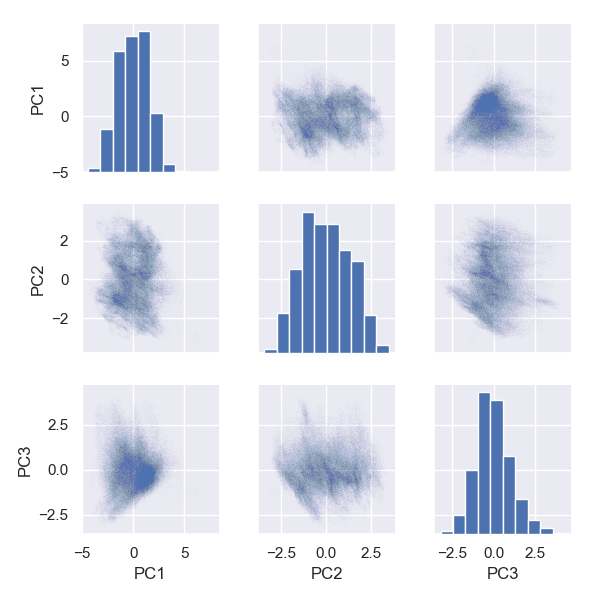

In [150]:
sns.pairplot(df_pcs[::njump],height=2,plot_kws={"s": 0.04,"marker":'.',"edgecolor":"none"})

N-Clusters

In [154]:
def get_wcss(data,maxk=15):
    wcss=[]
    for k in tqdm(range(1,maxk)):
        kmeans = KMeans(k,init='k-means++')
        kmeans.fit_predict(data)
        wcss.append(kmeans.inertia_)
    return wcss

In [155]:
wcss_data = get_wcss(data0)
wcss_pca = get_wcss(pcs.T)

<IPython.core.display.Javascript object>


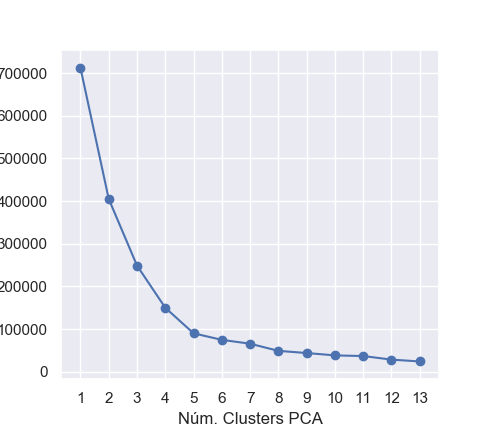

Text(0, 0.5, 'WCSS')

In [162]:
#ss=wcss_pca
#ss2=wcss_data
#delta=[]
#delta2=[]
#krange=range(1,len(ss)-1)
#for i in krange:
#    delta.append((ss[i-1]-ss[i]))
#    delta2.append((ss2[i-1]-ss2[i]))
wcss = pd.read_csv('wcss.csv')['wcss_pca']
delta=[]
for i in range(1,len(wcss)):
    delta.append(wcss[i-1]-wcss[i]) 
krange = range(1,len(delta)+1)

plt.plot(krange,delta)
plt.scatter(krange,delta)
plt.xticks(krange)
plt.xlabel('Núm. Clusters PCA')
plt.ylabel('WCSS')

In [169]:
pd.DataFrame(delta).to_csv('wcss_pca.csv')

K-Means

In [184]:
kmeans = KMeans(5,init='k-means++')
new_data = res.copy()
new_data['Cluster0']=kmeans.fit_predict(pcs.T)
clusters0=new_data['Cluster0']
df_pcs['Cluster0']=clusters0

In [200]:
df_pcs.to_csv('clusters_pcs.csv')

In [164]:
for i in new_data['Cluster0'].unique():
    print(i, len(new_data.loc[new_data['Cluster0'] == i]))

3 80704
2 122493
4 75762
0 98657
1 90603


<IPython.core.display.Javascript object>


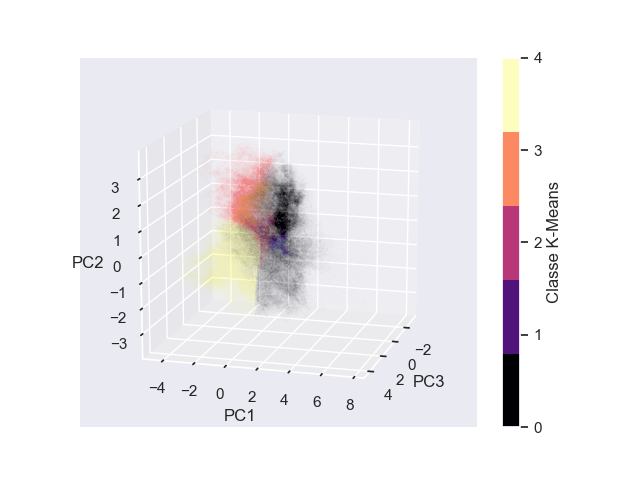

In [186]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap('magma', 5)
p = ax.scatter(pcs[2][::1],pcs[0][::1],pcs[1][::1],c=new_data['Cluster0'],zdir='z',cmap=cmap,depthshade=True,s=0.000003)
cbar = fig.colorbar(p,ticks=[0,1,2,3,4])
cbar.set_label('Classe K-Means')
ax.set_xlabel('PC3')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
ax.view_init(15, 16)
plt.show()


<IPython.core.display.Javascript object>


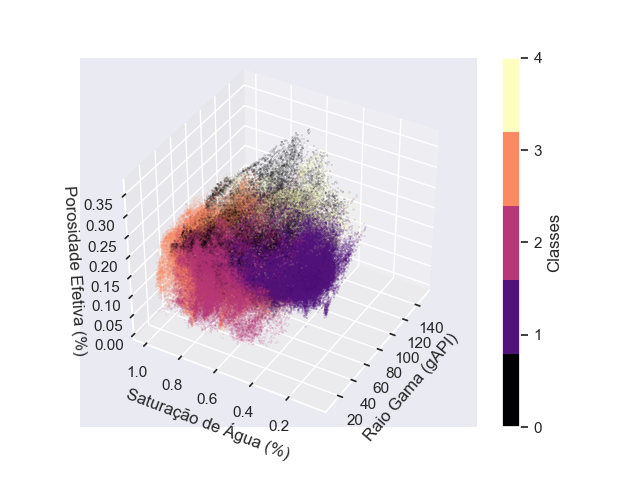

In [187]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap('magma', 5)
p = ax.scatter(res['GR'].iloc[::1],res['SW'].iloc[::1],res['phie'].iloc[::1],s=0.01,cmap=cmap,c=new_data['Cluster0'].iloc[::1],zdir='z',depthshade=True)
cbar = fig.colorbar(p,ticks=[0,1,2,3,4])
cbar.set_label('Classes')
ax.view_init(40, -150)
ax.set_ylabel('Saturação de Água (%)')
ax.set_zlabel('Porosidade Efetiva (%)')
ax.set_xlabel('Raio Gama (gAPI)')
plt.show()

<IPython.core.display.Javascript object>


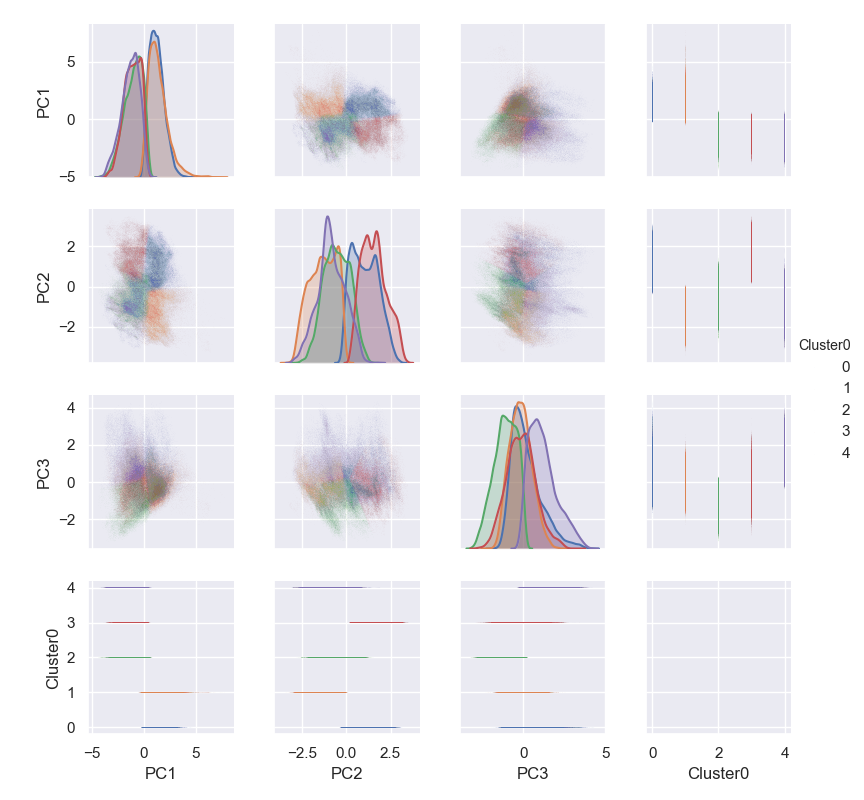

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [188]:
sns.pairplot(df_pcs[::njump],height=2,hue='Cluster0',plot_kws={"s": 0.04,"marker":'.',"edgecolor":"none"})

In [199]:
sns.pairplot(new_data[['SW','phie','GR','ILD','RHOB','Cluster0']][::njump],height=2,hue='Cluster0',plot_kws={"s": 0.04,"marker":'.',"edgecolor":"none"})

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Error in callback <function flush_figures at 0x000001B3780F7400> (for post_execute):


KeyboardInterrupt: 

Text(0.5, 0, 'J célula - Inlines')

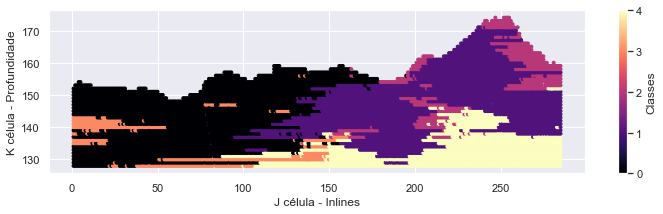

In [191]:
%matplotlib inline
j_slice=int((np.max(new_data['j']))/2)
j_slice_data=new_data.loc[new_data['j'] == j_slice]
xplot = j_slice_data['i']
yplot = j_slice_data['k']
plt.figure(figsize=(12,3))
plt.scatter(xplot,yplot,c=j_slice_data['Cluster0'],marker='.',cmap='magma')
plt.colorbar(ticks=[0,1,2,3,4],spacing='uniform',label='Classes')
plt.ylabel('K célula - Profundidade')
plt.xlabel('J célula - Inlines')

Text(0.5, 0, 'Longitude')

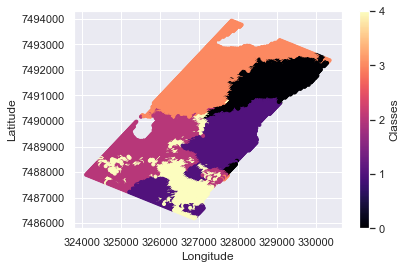

In [193]:
k_slice=int((np.median(new_data['k']))/1)
k_slice_data=new_data.loc[new_data['k'] == k_slice]
xplot = k_slice_data['X']
yplot = k_slice_data['Y']
plt.scatter(xplot,yplot,c=k_slice_data['Cluster0'],marker='.',cmap='magma')
plt.colorbar(ticks=[0,1,2,3,4],spacing='uniform',label='Classes')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

In [287]:
new_data.to_csv('cluster.csv')